This is the KERAS CNN implementation for the MALARIA CELL IMAGES DATASET

Breakdown of this notebook:

Loading the dataset: Load the data and import the libraries.

In [8]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import os
import cv2
from PIL import Image
# For CNN model creation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
SIZE = 64

In [2]:
!dir
os.path.isdir('.\\cell_images\\cell_images\\Parasitized')

 Volume in drive C has no label.
 Volume Serial Number is 34CD-A57C


True


 Directory of C:\SPB_Data\ee496

04/13/2020  04:44 PM    <DIR>          .
04/13/2020  04:44 PM    <DIR>          ..
04/13/2020  04:43 PM    <DIR>          .ipynb_checkpoints
04/07/2020  05:26 PM    <DIR>          cell_images
04/12/2020  05:06 PM           103,587 EE496_Malaria_Deteection-run2.ipynb
04/13/2020  04:30 PM           124,100 EE496_Malaria_Deteection.ipynb
04/13/2020  04:44 PM           115,470 EE496_Malaria_Deteection.old-Copy1.ipynb
04/13/2020  04:43 PM           115,537 EE496_Malaria_Deteection.old.ipynb
               4 File(s)        458,694 bytes
               4 Dir(s)  171,701,309,440 bytes free


In [3]:
infected = os.listdir('.\\cell_images\\cell_images\\Parasitized') 
uninfected = os.listdir('.\\cell_images\\cell_images\\Uninfected')

In [4]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread(".\\cell_images\\cell_images\\Parasitized\\"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread(".\\cell_images\\cell_images\\Uninfected\\"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

labels = np.array(labels)

In [5]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
  x_train, x_test = train_test_split(data, test_size=0.2, random_state=1,shuffle = True)
  y_train, y_test = train_test_split(labels, test_size=0.2, random_state=1)
  print(np.array(x_train).shape)

(22046, 64, 64, 3)


In [10]:
#regulization_list = [0, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1,10]
dropout_list = np.arange(0,0.55,0.05)
# probability axis values 
prob = []
# loss axis values 
loss = []
history = []
for i in dropout_list:
    classifier = tf.keras.Sequential()
    classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Flatten())
    classifier.add(Dense(  activation = 'relu', units=512))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Dense( activation = 'relu', units=256))
    classifier.add(BatchNormalization(axis = -1))
    classifier.add(Dropout(i))
    classifier.add(Dense(activation = 'sigmoid', units=2))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    print(classifier.summary())

    history.append( classifier.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 30, 
                         validation_split = 0.1,
                         shuffle = False))

    print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(x_test), np.array(y_test))[1]*100))
    loss.append(classifier.evaluate(np.array(x_test), np.array(y_test))[0])
    print(classifier.evaluate(np.array(x_test), np.array(y_test)))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

19841/19841 - 4s - loss: 0.3283 - accuracy: 0.8574 - val_loss: 1.0627 - val_accuracy: 0.6791
Epoch 2/30
19841/19841 - 3s - loss: 0.1830 - accuracy: 0.9325 - val_loss: 0.1756 - val_accuracy: 0.9340
Epoch 3/30
19841/19841 - 3s - loss: 0.1448 - accuracy: 0.9462 - val_loss: 0.3295 - val_accuracy: 0.8637
Epoch 4/30
19841/19841 - 3s - loss: 0.1145 - accuracy: 0.9579 - val_loss: 0.2767 - val_accuracy: 0.9234
Epoch 5/30
19841/19841 - 3s - loss: 0.0910 - accuracy: 0.9666 - val_loss: 0.1684 - val_accuracy: 0.9449
Epoch 6/30
19841/19841 - 3s - loss: 0.0674 - accuracy: 0.9764 - val_loss: 0.3946 - val_accuracy: 0.9247
Epoch 7/30
19841/19841 - 3s - loss: 0.0577 - accuracy: 0.9794 - val_loss: 0.1571 - val_accuracy: 0.9508
Epoch 8/30
19841/19841 - 3s - loss: 0.0453 - accuracy: 0.9847 - val_loss: 0.3795 - val_accuracy: 0.9193
Epoch 9/30
19841/19841 - 3s - loss: 0.0335 - accuracy: 0.9881 - val_loss: 0.2674 - val_accuracy: 0.9433
Epoch 10/30
19841/19841 - 3s - loss: 0.0287 - accuracy: 0.9907 - val_loss: 

Epoch 22/30
19841/19841 - 3s - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.4469 - val_accuracy: 0.9229
Epoch 23/30
19841/19841 - 3s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.2488 - val_accuracy: 0.9553
Epoch 24/30
19841/19841 - 3s - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.2593 - val_accuracy: 0.9424
Epoch 25/30
19841/19841 - 3s - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.2914 - val_accuracy: 0.9458
Epoch 26/30
19841/19841 - 3s - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.3128 - val_accuracy: 0.9270
Epoch 27/30
19841/19841 - 3s - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.5610 - val_accuracy: 0.8580
Epoch 28/30
19841/19841 - 3s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.4033 - val_accuracy: 0.9127
Epoch 29/30
19841/19841 - 3s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.5824 - val_accuracy: 0.7848
Epoch 30/30
19841/19841 - 3s - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.4141 - val_accuracy: 0.9061
5512/5512 [==============================] - 0s 85us/sa

Train on 19841 samples, validate on 2205 samples
Epoch 1/30
19841/19841 - 6s - loss: 0.5199 - accuracy: 0.7499 - val_loss: 0.6576 - val_accuracy: 0.8138
Epoch 2/30
19841/19841 - 3s - loss: 0.2284 - accuracy: 0.9127 - val_loss: 0.5939 - val_accuracy: 0.6202
Epoch 3/30
19841/19841 - 3s - loss: 0.1871 - accuracy: 0.9300 - val_loss: 0.2094 - val_accuracy: 0.9261
Epoch 4/30
19841/19841 - 3s - loss: 0.1603 - accuracy: 0.9395 - val_loss: 0.2573 - val_accuracy: 0.8995
Epoch 5/30
19841/19841 - 3s - loss: 0.1323 - accuracy: 0.9517 - val_loss: 1.2644 - val_accuracy: 0.6934
Epoch 6/30
19841/19841 - 3s - loss: 0.1146 - accuracy: 0.9587 - val_loss: 0.2121 - val_accuracy: 0.9265
Epoch 7/30
19841/19841 - 3s - loss: 0.0979 - accuracy: 0.9640 - val_loss: 0.4444 - val_accuracy: 0.8753
Epoch 8/30
19841/19841 - 3s - loss: 0.0914 - accuracy: 0.9663 - val_loss: 0.1558 - val_accuracy: 0.9497
Epoch 9/30
19841/19841 - 3s - loss: 0.0786 - accuracy: 0.9714 - val_loss: 1.2075 - val_accuracy: 0.6646
Epoch 10/30
198

Epoch 22/30
19841/19841 - 3s - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.2556 - val_accuracy: 0.9517
Epoch 23/30
19841/19841 - 3s - loss: 0.0285 - accuracy: 0.9899 - val_loss: 0.2130 - val_accuracy: 0.9476
Epoch 24/30
19841/19841 - 3s - loss: 0.0221 - accuracy: 0.9918 - val_loss: 0.1899 - val_accuracy: 0.9576
Epoch 25/30
19841/19841 - 3s - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.1831 - val_accuracy: 0.9599
Epoch 26/30
19841/19841 - 3s - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.1991 - val_accuracy: 0.9553
Epoch 27/30
19841/19841 - 3s - loss: 0.0142 - accuracy: 0.9949 - val_loss: 0.2009 - val_accuracy: 0.9624
Epoch 28/30
19841/19841 - 3s - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.2255 - val_accuracy: 0.9488
Epoch 29/30
19841/19841 - 3s - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.2077 - val_accuracy: 0.9576
Epoch 30/30
19841/19841 - 3s - loss: 0.0111 - accuracy: 0.9958 - val_loss: 0.2176 - val_accuracy: 0.9605
5512/5512 [==============================] - 1s 109us/s

Train on 19841 samples, validate on 2205 samples
Epoch 1/30
19841/19841 - 4s - loss: 0.5193 - accuracy: 0.7603 - val_loss: 1.2804 - val_accuracy: 0.7150
Epoch 2/30
19841/19841 - 3s - loss: 0.2457 - accuracy: 0.9097 - val_loss: 0.4006 - val_accuracy: 0.8882
Epoch 3/30
19841/19841 - 3s - loss: 0.2024 - accuracy: 0.9260 - val_loss: 0.2492 - val_accuracy: 0.9236
Epoch 4/30
19841/19841 - 3s - loss: 0.1819 - accuracy: 0.9349 - val_loss: 0.2259 - val_accuracy: 0.9229
Epoch 5/30
19841/19841 - 3s - loss: 0.1620 - accuracy: 0.9411 - val_loss: 0.2083 - val_accuracy: 0.9345
Epoch 6/30
19841/19841 - 3s - loss: 0.1507 - accuracy: 0.9458 - val_loss: 0.1501 - val_accuracy: 0.9501
Epoch 7/30
19841/19841 - 3s - loss: 0.1356 - accuracy: 0.9515 - val_loss: 0.1945 - val_accuracy: 0.9236
Epoch 8/30
19841/19841 - 3s - loss: 0.1205 - accuracy: 0.9568 - val_loss: 0.1602 - val_accuracy: 0.9492
Epoch 9/30
19841/19841 - 3s - loss: 0.1121 - accuracy: 0.9593 - val_loss: 0.2182 - val_accuracy: 0.9032
Epoch 10/30
198

Epoch 22/30
19841/19841 - 3s - loss: 0.0551 - accuracy: 0.9809 - val_loss: 0.1861 - val_accuracy: 0.9544
Epoch 23/30
19841/19841 - 3s - loss: 0.0550 - accuracy: 0.9804 - val_loss: 0.2098 - val_accuracy: 0.9170
Epoch 24/30
19841/19841 - 3s - loss: 0.0498 - accuracy: 0.9818 - val_loss: 0.1905 - val_accuracy: 0.9601
Epoch 25/30
19841/19841 - 3s - loss: 0.0475 - accuracy: 0.9824 - val_loss: 0.2024 - val_accuracy: 0.9401
Epoch 26/30
19841/19841 - 3s - loss: 0.0429 - accuracy: 0.9851 - val_loss: 0.1736 - val_accuracy: 0.9531
Epoch 27/30
19841/19841 - 3s - loss: 0.0399 - accuracy: 0.9866 - val_loss: 0.1893 - val_accuracy: 0.9515
Epoch 28/30
19841/19841 - 3s - loss: 0.0351 - accuracy: 0.9880 - val_loss: 0.2008 - val_accuracy: 0.9596
Epoch 29/30
19841/19841 - 3s - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.1672 - val_accuracy: 0.9587
Epoch 30/30
19841/19841 - 3s - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.1760 - val_accuracy: 0.9556
5512/5512 [==============================] - 0s 90us/sa

19841/19841 - 4s - loss: 0.6568 - accuracy: 0.6836 - val_loss: 4.8844 - val_accuracy: 0.5447
Epoch 2/30
19841/19841 - 3s - loss: 0.2967 - accuracy: 0.8865 - val_loss: 0.4580 - val_accuracy: 0.8639
Epoch 3/30
19841/19841 - 3s - loss: 0.2351 - accuracy: 0.9140 - val_loss: 0.2660 - val_accuracy: 0.9016
Epoch 4/30
19841/19841 - 3s - loss: 0.2133 - accuracy: 0.9238 - val_loss: 0.3199 - val_accuracy: 0.8893
Epoch 5/30
19841/19841 - 3s - loss: 0.1955 - accuracy: 0.9323 - val_loss: 0.1970 - val_accuracy: 0.9347
Epoch 6/30
19841/19841 - 3s - loss: 0.1854 - accuracy: 0.9348 - val_loss: 0.1824 - val_accuracy: 0.9399
Epoch 7/30
19841/19841 - 3s - loss: 0.1775 - accuracy: 0.9382 - val_loss: 0.1814 - val_accuracy: 0.9370
Epoch 8/30
19841/19841 - 3s - loss: 0.1649 - accuracy: 0.9424 - val_loss: 0.1791 - val_accuracy: 0.9426
Epoch 9/30
19841/19841 - 3s - loss: 0.1586 - accuracy: 0.9443 - val_loss: 0.1708 - val_accuracy: 0.9374
Epoch 10/30
19841/19841 - 3s - loss: 0.1499 - accuracy: 0.9485 - val_loss: 

In [20]:
print(loss)
val_loss = []
train_loss = []
print(history[1].history['loss'])
print(history[1].history['val_loss'])
print(dropout_list)
print()
for i in history:
    val_loss.append(i.history['loss'][29])
    train_loss.append(i.history['val_loss'][29])
    

[0.4152763742659932, 0.38038920334242765, 0.43252052320235007, 0.3962442827526651, 0.28436498441368463, 0.269561541073446, 0.2287300884208665, 0.259071782611497, 0.22203953070364993, 0.20125958651131226, 0.18211332771383734]
[0.32827333568907824, 0.18300094258598393, 0.14482318020583124, 0.11454605989522026, 0.09100900150542238, 0.06737930438918792, 0.057740645261488824, 0.045308275682347826, 0.03352695795958108, 0.02866002260871841, 0.026956511914225382, 0.018836229212901675, 0.014781797633042926, 0.012462382306782798, 0.01676060803087, 0.011416444890587872, 0.012096141113738036, 0.01651977323516501, 0.012831334064988596, 0.00964080356135388, 0.00627603866551507, 0.0049333052823021875, 0.008009629853002284, 0.0139347154305253, 0.00630883341417857, 0.00396308191509986, 0.0030535343288374327, 0.005297182848420504, 0.012721946576933995, 0.006811403073273175]
[1.0626710232963907, 0.17555225200258415, 0.32953577478186075, 0.27672374671548944, 0.16838781930962388, 0.39461830405691584, 0.157

Text(0.5, 0, 'dropout rate')

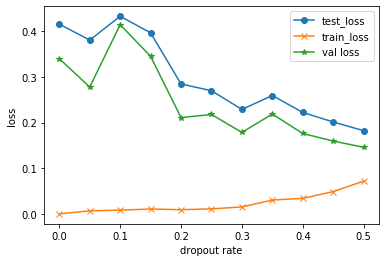

In [23]:
plt.plot(dropout_list, loss,'o-',label='test_loss')
plt.plot(dropout_list, val_loss,'x-',label='train_loss')
plt.plot(dropout_list, train_loss,'*-',label='val loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('dropout rate')
